Importing neccesary dependcies


In [2]:
!pip install xgboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 362.4 kB/s eta 0:05:44
   ---------------------------------------- 0.5/124.9 MB 362.4 kB/s eta 0:05:44
   ---------------------------------------- 0.5/124.9 MB 362.4 kB/s eta 0:05:44
   ---------------------------------------- 0.5/124.9 MB 362.4 kB/s eta 0:05:44
   ---------------------------------------- 0.8/124.9 MB 340.8 kB/s eta 0:06:05
   ---------------------------------------- 0.8/124.9 MB 340.8 kB/s eta 0:06:05
   --------------------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Load Dataset

In [3]:
dataset = pd.read_csv(r"C:\Users\admin\Documents\Projects\House Price Prediction Project\housing.csv")
print(dataset)

    0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00
0     0.02731   0.00   7.070  0  0.4690  6.4210  78...                                             
1     0.02729   0.00   7.070  0  0.4690  7.1850  61...                                             
2     0.03237   0.00   2.180  0  0.4580  6.9980  45...                                             
3     0.06905   0.00   2.180  0  0.4580  7.1470  54...                                             
4     0.02985   0.00   2.180  0  0.4580  6.4300  58...                                             
..                                                 ...                                             
500   0.06263   0.00  11.930  0  0.5730  6.5930  69...                                             
501   0.04527   0.00  11.930  0  0.5730  6.1200  76...                                             
502   0.06076   0.00  11.930  0  0.5730  6.9760  91...                                             


In [9]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
california_housing = fetch_california_housing()

# Convert the data into a DataFrame
dataset = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

# Assign the target variable (MEDV) to the DataFrame as a new column
#dataset['medv'] = boston.target
dataset['medv'] = california_housing.target
print(dataset.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude   medv  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [10]:
dataset.shape

(20640, 9)

In [11]:
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
medv          0
dtype: int64

In [12]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,medv
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


FINDING CORRELATION

1.Positive Correlation

2.Negative Correlation

In [13]:
correlation = dataset.corr()

<Axes: >

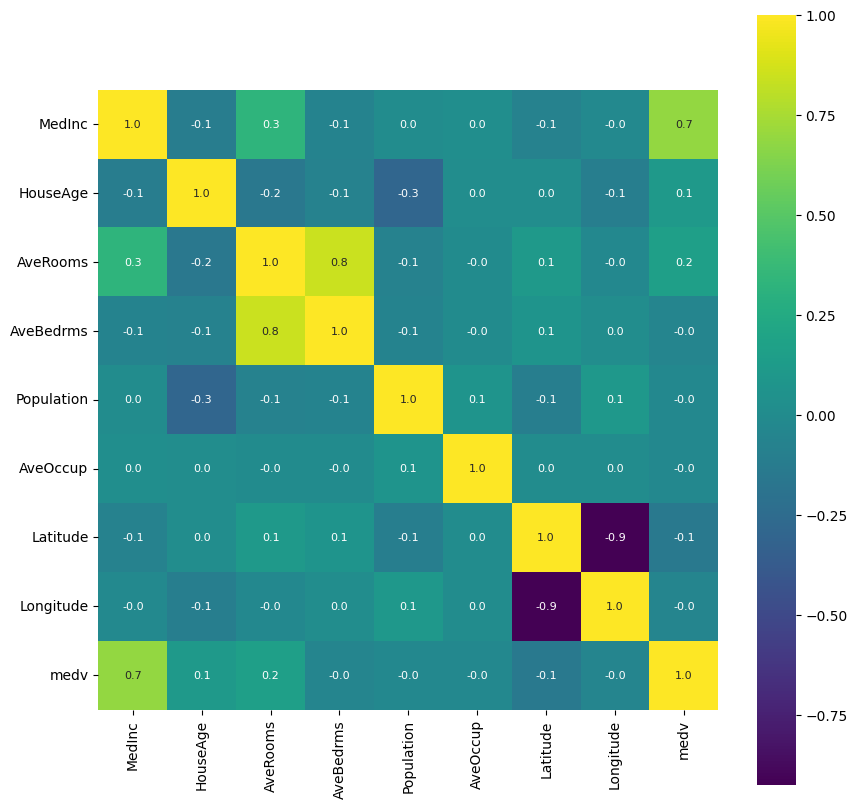

In [14]:
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='viridis')

SPLITTING THE DATASET INTO TRAIN AND TEST

In [15]:
X = dataset.drop(['medv'], axis=1)
Y = dataset['medv']

print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


MODEL TRAINING

XGBoost Regressor

In [18]:
#load the model
model=XGBRegressor()

model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

EVALUATION

Prediction on training data

In [19]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)
#print(training_data_prediction)

In [20]:
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [21]:
# R squared error
s_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
s_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", s_1)
print('Mean Absolute Error : ', s_2)

R squared error :  0.943650140819218
Mean Absolute Error :  0.1933648700612105


Visualizing the actual Prices and predicted prices

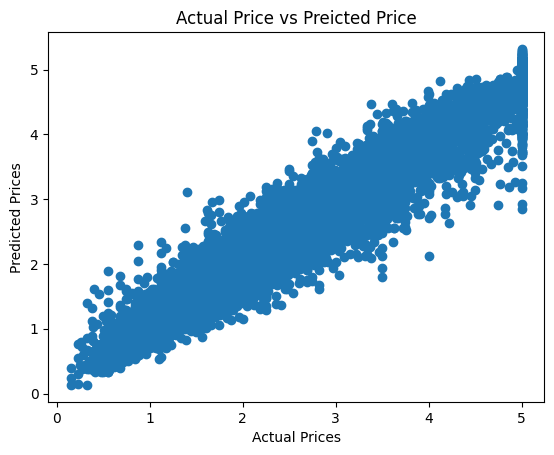

In [22]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

Prediction on test data

In [23]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[2.8649795  1.790346   0.92074925 ... 1.5385513  0.92647874 2.043316  ]


In [24]:
# R squared error
se_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
se_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", se_1)
print('Mean Absolute Error : ', se_2)

R squared error :  0.8338000331788725
Mean Absolute Error :  0.3108631800268186


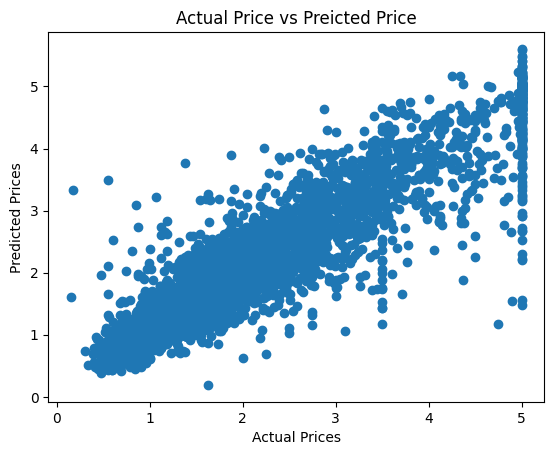

In [25]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()